# Aim:To make Prediction model of AC Servomotor and to plot speed-torque characteristics.

This is the data set of Practical reading of AC Servo  Motor in Laboratory here I am going to make prediction model of 
AC servomotor. 
Introduction of Servomotor-   An A.C. servo motor is basically a two phase induction motor except for certain special 
design features.
    A two phase induction motor consisting of two stator windings oriented 90 degrees electrically apart in space
    and excited by a.c. voltages which differ in time phase by 90 degrees. Generally voltages of equal magnitude 
    and 90 degrees phase difference are applied to the stator phases thus making their respective fields 90 degrees 
    apart in both tomes and space, at synchronous speed. As the field sweeps over the rotor, voltages are induced in
    it producing current in the short circuited rotor. The rotating magnetic field interacts with these current producing
    a torque on the rotor in the direction of field rotation.

The shape of the characteristics depends on the ratio of the rotor reactance (X) to the rotor resistance (R).
In normal induction motor differs in two ways from normal induction motor.

1)	The rotor of the servo motor is built with high resistance so that its X/R ratio is small. 

Curve is nearly linear in contrast to highly nonlinear characteristic with large X/R ratio it 
must be emphasized that if a conventional induction motor with high X/R ratio is used for servo applications, 
then because of the positive slope for part of the characteristics, the system using such a motor becomes unstable. 
The motor construction is usually squirrel cage or drag cup type. The diameter of the rotor is kept small in order 
to reduce inertia and thus to obtain good accelerating characteristics. Drag cup construction is used for a very low
inertia operation. 

2)	In servo applications, the voltages applied to the two stator winding are seldom balanced. One of the phases 
known as the control phase with respect to the voltage supplied to the reference windings and it has a variable
magnitude and polarity. The control winding voltage is supplied from a servo amplifier.


Torque Measurement

The electrical power developed by the AC servo motor is given by the product of back emf generated by the 
dc machine and current we are forcing through the armature by means of a variable resistance and the constant 
voltage source. By varying the resistance, the current is changing and the opposite torque is also changing. 
The following formula is used to find the torque in gm-cm.
T =( p *1.019 *10^4* 60 )/2 pi *N    gm  cm

 N Where Eb = Back E.M.F

Ia = Armature current    P = power in watts

= Eb x Ia

N = R.P.M


Imports the important library and read the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("servomtr_expt.csv")#displaying the dataset of readings
df

,Sr.,Ia(mA),Speed N(RPM),Eb in Volt.,Pmw = Eb x Ia in Millwatt,Torque Gm-cms
0,1,0,1375,1.37,0,0.00
1,2,100,1300,1.30,130,937.00
2,3,200,1225,1.22,243,19.96
3,4,300,1175,1.17,352,29.19
4,5,400,925,0.92,370,38.92


In [4]:
df.isnull().sum()# for displaying any missing value

Sr.                          0
Ia(mA)                       0
Speed N(RPM)                 0
Eb in Volt.                  0
Pmw = Eb x Ia in Millwatt    0
Torque Gm-cms                0
dtype: int64

Information about the data set

Ia-It is the armature current,producing through the armature winding,it measures in Ampere.

Eb-Back EMF measured in voltage.

Speed of servomotor in rpm

on the basis of we measure the Torque and find the relationship between back through the charterstics.

here the target is the Torque and input should be current,back EMF and speed.

In [5]:
import matplotlib .pyplot as plt#for displaying the plots visualization
import seaborn as sns#display visualiation 
import sklearn
from sklearn.linear_model import LinearRegression

In [6]:
df.shape#information about matrix size

(5, 6)

In [7]:
df.describe()# calulates mean,max min,standard deviation and count.

,Sr.,Ia(mA),Speed N(RPM),Eb in Volt.,Pmw = Eb x Ia in Millwatt,Torque Gm-cms
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,200.000000,1200.000000,1.196000,219.000000,205.014000
std,1.581139,158.113883,171.391365,0.172134,155.682369,409.444906
min,1.000000,0.000000,925.000000,0.920000,0.000000,0.000000
25%,2.000000,100.000000,1175.000000,1.170000,130.000000,19.960000
50%,3.000000,200.000000,1225.000000,1.220000,243.000000,29.190000
75%,4.000000,300.000000,1300.000000,1.300000,352.000000,38.920000
max,5.000000,400.000000,1375.000000,1.370000,370.000000,937.000000


From the above describe function ,we get the information about the data set.
In the table there different parameters.we are interested to know about output variable here output variable 
will be Torque of Servo motor.
and input variable are Current(Ia),Speed (N in RPM).
This all are the practical readings generated throuth the servo-motor.

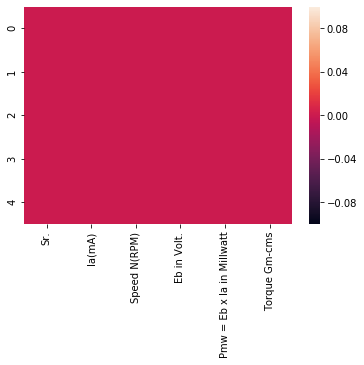

In [8]:
sns.heatmap(df.isnull())#plot of null values here in the database no null value present

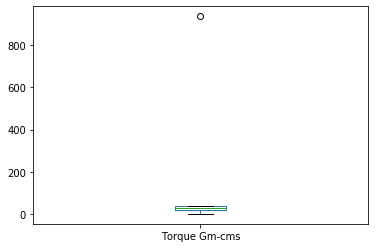

In [9]:
df['Torque Gm-cms'].plot.box()#Box plots is used to finding outliers.

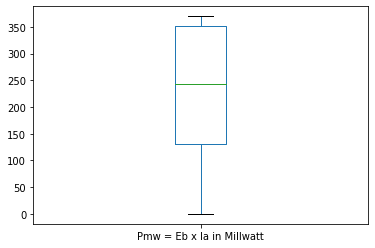

In [10]:
df['Pmw = Eb x Ia in Millwatt'].plot.box()

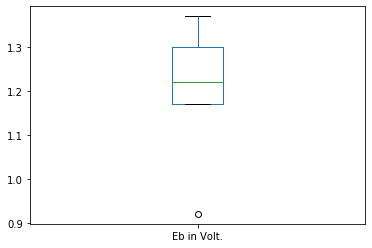

In [11]:
df['Eb in Volt.'].plot.box()

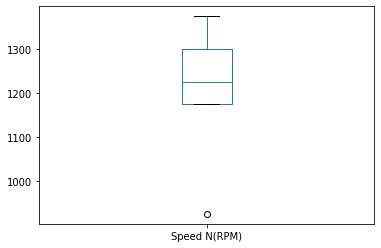

In [12]:
df['Speed N(RPM)'].plot.box()

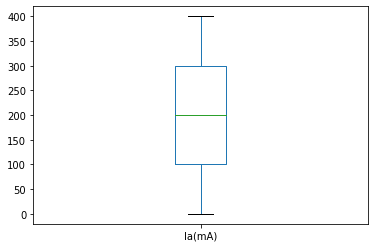

In [13]:
df['Ia(mA)'].plot.box()

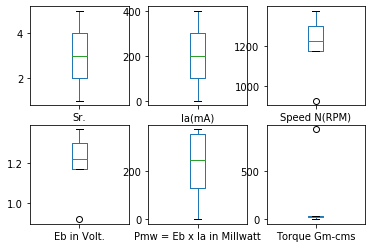

In [14]:
df.plot(kind='box',subplots=True,layout=(2,3))
plt.show()

we can see here outliers are present in the datasets

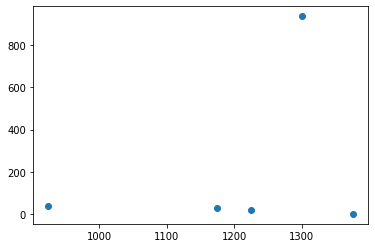

In [15]:
plt.scatter(df['Speed N(RPM)'],df['Torque Gm-cms'])

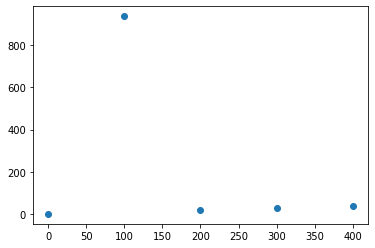

In [16]:
plt.scatter(df['Ia(mA)'],df['Torque Gm-cms'])

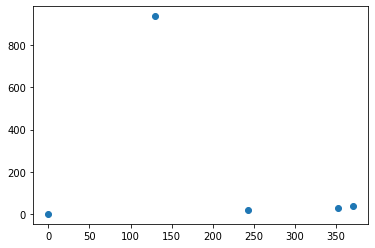

In [17]:
plt.scatter(df['Pmw = Eb x Ia in Millwatt'],df['Torque Gm-cms'])

This is the scatter plot which are showing linearity or relationship between two input and outputs.


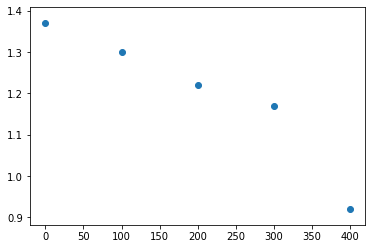

In [18]:
plt.scatter(df['Ia(mA)'],df['Eb in Volt.'])

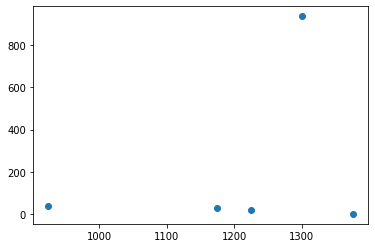

In [19]:
x=df['Speed N(RPM)']
y=df['Torque Gm-cms']
plt.scatter(x,y)
plt.show()

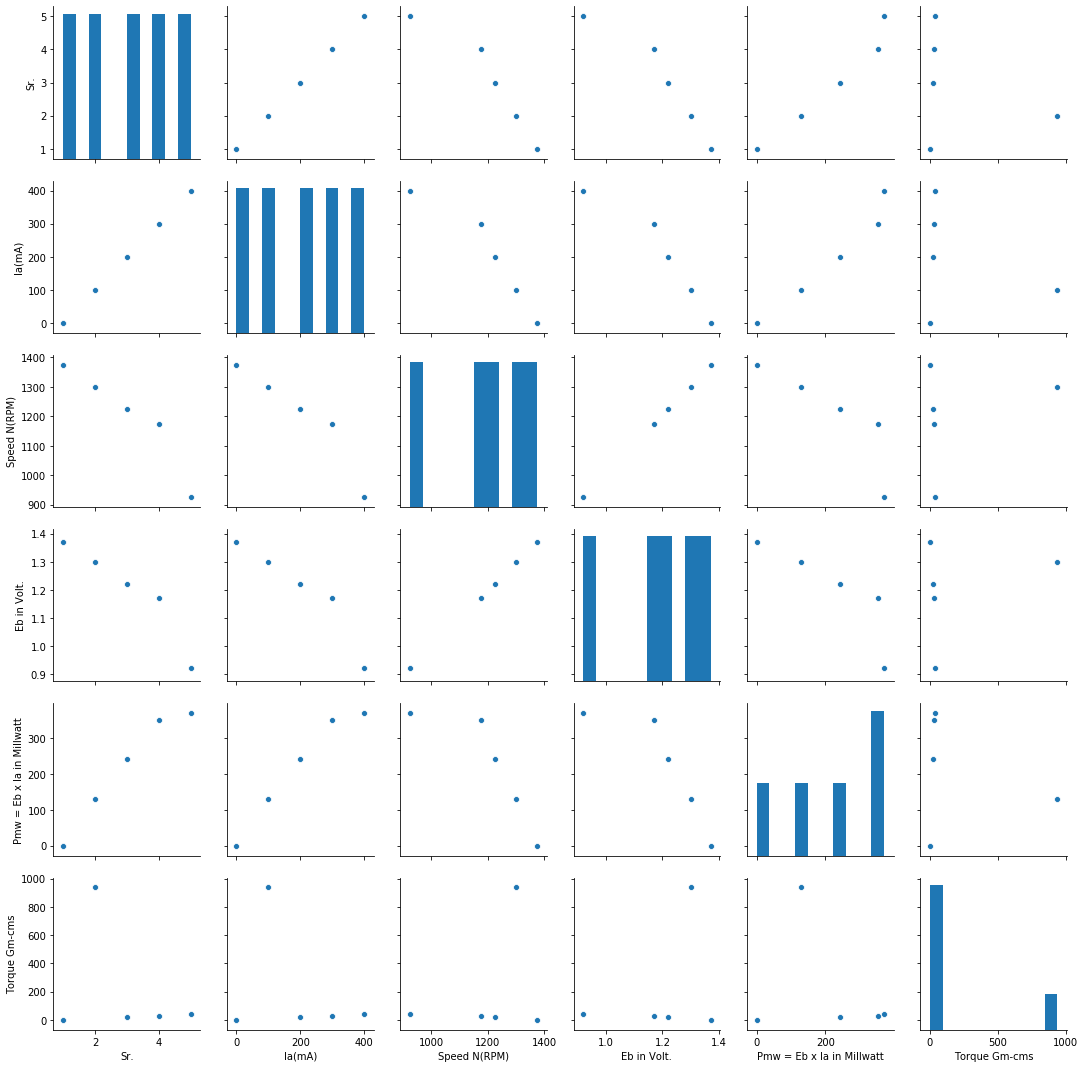

In [20]:
sns.pairplot(df)

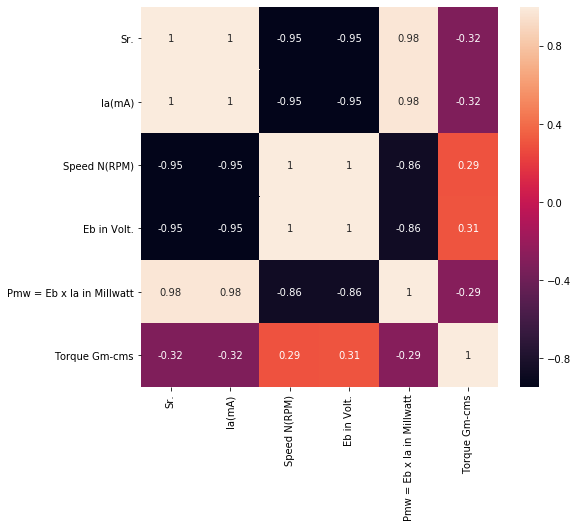

In [21]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Covariance plot which shows the strong and weak relationship between the attributes.
here speed and torque shows the strong bounding and also back emf and Torque has strong corelation but 
the weak relationship in Torque and Current.

In [22]:
df.head(2)#displaying two rows of tables

,Sr.,Ia(mA),Speed N(RPM),Eb in Volt.,Pmw = Eb x Ia in Millwatt,Torque Gm-cms
0,1,0,1375,1.37,0,0.0
1,2,100,1300,1.30,130,937.0


Pre-Processing the Data 
we need to define x and y variables for training and testing purpose

In [23]:
x=df.iloc[:,1:-1]#input parameters
x.head()

,Ia(mA),Speed N(RPM),Eb in Volt.,Pmw = Eb x Ia in Millwatt
0,0,1375,1.37,0
1,100,1300,1.30,130
2,200,1225,1.22,243
3,300,1175,1.17,352
4,400,925,0.92,370


In [24]:
y=df.iloc[:,-1]# this is the output variables i.e torque
y.head()

0      0.00
1    937.00
2     19.96
3     29.19
4     38.92
Name: Torque Gm-cms, dtype: float64

Importing important libraries for further processing

In [25]:
from sklearn.metrics import mean_squared_error#for calculating the mean squared error
from sklearn.model_selection import train_test_split#for trainig and testing the data


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=47)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(y_test.shape)


(3, 4)
(2, 4)
(3,)
(2,)


Building Machine Learning Algorithm
Linear Regression-In our dataset the output variable is Torque and it is in the continue form so we should be apply
Linear Regression method.
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. ... Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x).
on the basis of trainig dataset we can make the prediction model so that it can predict the value of torque on next value of speed.


In [28]:
lm=LinearRegression()#definig variable

In [29]:
lm.fit(x_train,y_train)#to fit the data in linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.coef_# calculating the value of coefficient

array([ 3.44984539e-02, -2.21739835e-02, -2.21739835e-05,  4.09251782e-02])

In [31]:
lm.intercept_#calculating the intercept 

30.48925762495457

In [32]:
lm.score(x_train,y_train)# Calculating Accuracy SCore


1.0

Here we are getting the 100% accuracy score

In [33]:
pred=lm.predict(x_test)
print("Predicted result Torque:",pred)
print("actual Torque",y_test)

Predicted result Torque: [20.17060991 10.43316886]
actual Torque 2     19.96
1    937.00
Name: Torque Gm-cms, dtype: float64


In [34]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
429263.0684631539


In [35]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-1.0417706573523486


In [36]:
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [37]:
#Lasso and Redge Model
ls = Lasso()
ls.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
print(ls.coef_)
print(ls.intercept_)
print(ls.score(x_train,y_train))


[ 9.72648062e-02 -1.06999057e-06 -0.00000000e+00  0.00000000e+00]
0.00945128371435544
0.9999998771367906


In [40]:
rid=Ridge()
rid.fit(x_train,y_train)
print(rid.coef_)
print(rid.intercept_)
print(rid.score(x_train,y_train))

[ 3.44981637e-02 -2.21746599e-02 -2.21746599e-05  4.09243664e-02]
30.49030420446685
0.9999999999655957


In [41]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [42]:
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=47)

In [43]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lm.score(x_train,y_train)

1.0

SO we can see that we are getting 100% result from regression so all the predicted result of accuracy of Torque
is correctly.